In [2]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from analyser import *

## Import all accepted submissions for a specifc course

In [3]:
subs = import_submissions(course_id = "C00199", dbname="test1")

In [4]:
subs = subs[subs.veredict == 'AC']
subs.describe()

,submission_uid,user_id,problem_id,submission_id,state,time_out,time_in,veredict,score
count,49228,49228,49228,49228,49228,49228,49228,49228,0.0
unique,49228,448,310,32,1,48646,48643,1,0.0
top,S001432615,U14563,X89070,S001,done,2015-09-10 11:25:36,2015-09-09 11:45:39,AC,NaN
freq,1,443,605,27518,49228,3,4,49228,NaN
first,NaN,NaN,NaN,NaN,NaN,2010-09-17 14:25:55,2010-09-12 09:21:19,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2016-02-24 09:24:20,2016-02-24 09:24:09,NaN,NaN


In [5]:
subs = subs.sort_values(by='time_out')

## Generate each users sequence

In [6]:
# Users list
users = subs.user_id.unique()
print "%d Users" % len(users)

448 Users


In [7]:
# Users pbls
pbls = subs.problem_id.unique()
print "%d resolved problems" % len(pbls)

310 resolved problems


In [8]:
# Longuest sequence
seqsize = subs.user_id.value_counts(normalize=False)[0]
print ("the longuest sequence is %d accepted submissions long" % seqsize )

the longuest sequence is 443 accepted submissions long


In [9]:
sequences = pd.DataFrame(index=range(seqsize), columns=users)

In [10]:
df = pd.DataFrame()
for u in users:
    df[u] = pd.Series(subs[subs.user_id == u].problem_id.values)

## Analyse a typical sequence

## sequence size vs number of users

<IPython.core.display.Javascript object>


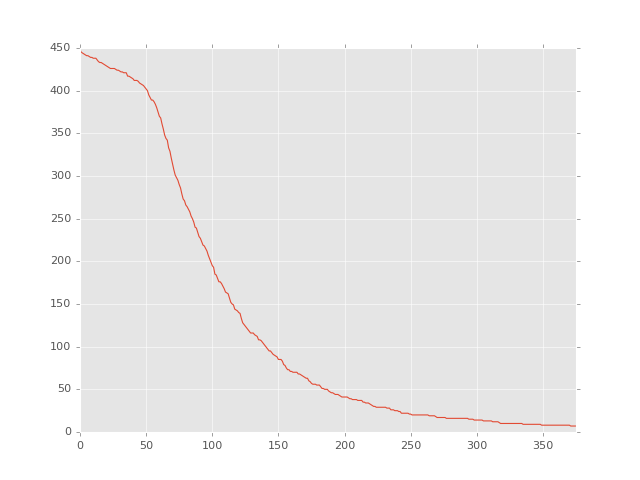

In [11]:
df.T.describe().T["count"].plot()

## How many differents for each level ?

<IPython.core.display.Javascript object>


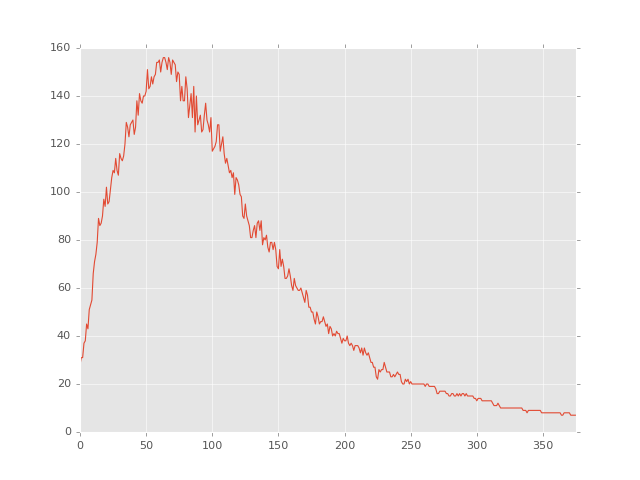

In [12]:
plt.figure()
df.T.describe().T["unique"].plot()

## How many differents for each level ? --> unique/total correlation 

In [280]:
# df.T.describe().T

<IPython.core.display.Javascript object>


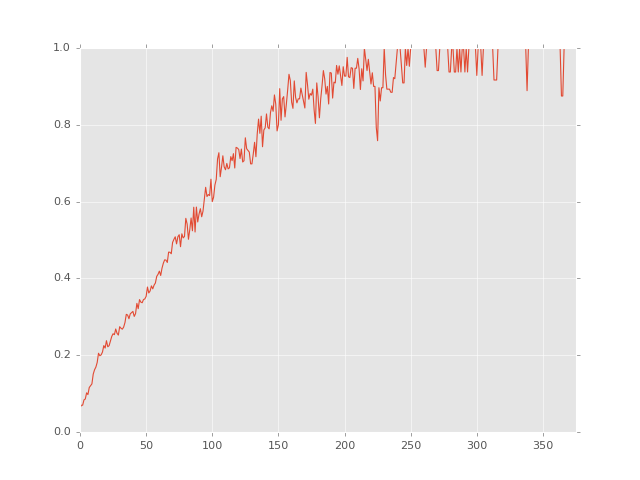

In [13]:
plt.figure()
(df.T.describe().T["unique"] / df.T.describe().T["count"]).plot()

## Let's iterate for the whole process

In [14]:
steps = []
pbls = []
for i in df.T:
    p = df.T[i].value_counts()
    pbls.append(p.index[0])
    s = p.sum()
    steps.append(p.apply(lambda x : float(x) / s))
    

In [15]:
df2 = pd.DataFrame(steps)

## Typical evolution

In [16]:
#df2.T[0]

### Typical evolution confidence

<IPython.core.display.Javascript object>


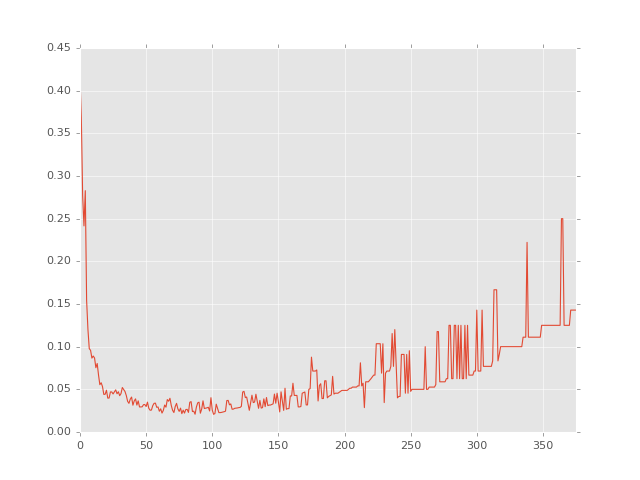

In [17]:
plt.figure()
evol = pd.Series([s[0] for s in steps])
evol.plot()

<IPython.core.display.Javascript object>


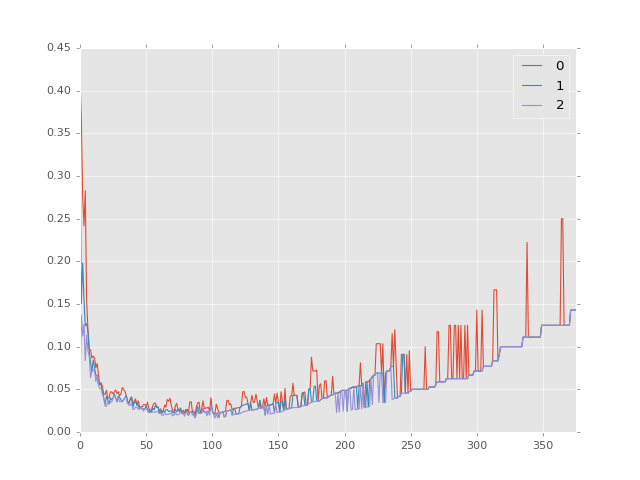

In [21]:
posi = 0
posj = 3

evol = pd.DataFrame([[s[i] if len(s) > posj-1 else 0 for s in steps] for i in range(posi, posj)], 
                    index=range(posi, posj))
evol.T.plot()